# Pandas 1

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Learning objectives

 - Pandas:
     - Python module: tools for doing Data Science
     - helps deal with tabular (tables) data
 - List of list is not adequate alternative to excel
 - Series: new data structure
     - hybrid of a dict and a list
     - Python dict "key" equivalent to "index" in pandas
     - Python list "index" quivalent to "integer position" in pandas
     - supports complicated expressions within lookup [...]
     - element-wise operation
     - boolean indexing
 - DataFrames aka tables (next lecture)
     - built from series
     - each series will be a column in the table

# pandas comes with Anaconda installation
If for some reason, you don't have pandas installed, run the following command in terminal or powershell
<pre> pip install pandas </pre>

In [2]:
# importing pandas module
import pandas

## Module naming abbreviation

In [3]:
# Common abbrievation for pandas module
import pandas as pd

## Create a series from a dict

In [4]:
# create a series from a dict
d = {"one": 7, "two": 8, "three": 9}
d

{'one': 7, 'two': 8, 'three': 9}

In [5]:
pd.Series

pandas.core.series.Series

In [6]:
s = pd.Series(d)
s

one      7
two      8
three    9
dtype: int64

In [7]:
s = pd.Series({"one": 7, "two": 8, "three": 9}) # equivalent to the above example
s

one      7
two      8
three    9
dtype: int64

In [8]:
# IP  index    value
# 0   one      7
# 1   two      8
# 2   three    9

# dtype: int64

## Accessing values with index (.loc[...])

In [9]:
d

{'one': 7, 'two': 8, 'three': 9}

In [10]:
# dict access with key
d["one"]

7

In [11]:
s.loc["one"]

7

In [12]:
s.loc["two"]

8

## Accessing values with integer position (.iloc[...])

In [13]:
s.iloc[0]

7

In [14]:
s.iloc[-1]

9

## Regular lookups with just [ ]

In [15]:
s

one      7
two      8
three    9
dtype: int64

In [16]:
s["one"]

7

In [17]:
s[0]

7

## Accessing multiple values with a list of integer positions

In [18]:
s[[1, 2]]

two      8
three    9
dtype: int64

In [19]:
# series access with a list of indexes
s[["two", "three"]]

two      8
three    9
dtype: int64

## Create a series from a list

In [20]:
# Series created from a list
num_list = [100, 200, 300]
s = pd.Series(num_list)
s

0    100
1    200
2    300
dtype: int64

In [21]:
# IP  index value
# 0   0      100
# 1   1      200
# 2   2      300
# dtype: int64

In [22]:
print(s.loc[1])
print(s.iloc[1])

200
200


pandas looks for an index when we do a [ ] lookup, by default

In [23]:
letters_list = ["A", "B", "C", "D"]
letters = pd.Series(letters_list)
letters
# letters[-1] # Avoid negative indexes, unless we use .iloc
letters.iloc[-1]

'D'

## Slicing series using integer positions

In [24]:
letters_list = ["A", "B", "C", "D"]
letters = pd.Series(letters_list)
letters

0    A
1    B
2    C
3    D
dtype: object

In [25]:
# list slicing
sliced_letter_list = letters_list[2:]
sliced_letter_list

['C', 'D']

Sliced Series retains original Series index, whereas integer positions are renumbered.

In [26]:
sliced_letters = letters[2:]
sliced_letters

2    C
3    D
dtype: object

In [27]:
# Note: integer positions get renumbered, whereas indexes do not.

# IP  Index  values
# 0   2       C
# 1   3       D
# dtype: object

In [28]:
print(sliced_letters.loc[2])
print(sliced_letters.iloc[0])

C
C


## Slicing series using index

In [29]:
s = pd.Series({"one": 7, "two": 8, "three": 9})
s

one      7
two      8
three    9
dtype: int64

In [30]:
#slicing with indexes
s["two":]

two      8
three    9
dtype: int64

## Statistics on Series

In [31]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
scores

0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

In [32]:
scores.mean()

50.54545454545455

In [33]:
scores.std()

26.051347897426098

In [34]:
scores.median()

47.0

In [35]:
scores.mode()

0    23
1    47
dtype: int64

In [36]:
scores.quantile([1.0, 0.75, 0.5, 0.25, 0])

1.00    92.0
0.75    72.5
0.50    47.0
0.25    27.5
0.00    19.0
dtype: float64

## CS220 information survey data

In [37]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("cs220_survey_data.csv")
header = data[0]
data = data[1:]

In [38]:
header

['lecture', 'age', 'major', 'topping']

In [39]:
data[:3]

[['LEC001', '19', 'Computer Science', 'basil/spinach'],
 ['LEC002', '18', 'Engineering', 'pineapple'],
 ['LEC003', '19', 'Business', 'pepperoni']]

In [40]:
# use list comprehension to extract just ages
# age_list = [int(row[1]) for row in data if row[1] != ""]
age_list = [int(row[header.index("age")]) for row in data if row[header.index("age")] != ""]
#age_list

In [41]:
cs220_ages = pd.Series(age_list)
cs220_ages

0      19
1      18
2      19
3      19
4      19
       ..
877    19
878    20
879    21
880    19
881    18
Length: 882, dtype: int64

## Unique values in a Series

In [42]:
cs220_ages.value_counts()

19    290
18    214
20    178
21    101
22     41
23     13
17     11
25      7
24      6
26      4
28      3
29      2
30      2
27      2
34      1
37      1
35      1
16      1
33      1
32      1
31      1
46      1
dtype: int64

## Series sorting
- can be done using index or values

In [43]:
cs220_ages.value_counts().sort_index()

16      1
17     11
18    214
19    290
20    178
21    101
22     41
23     13
24      6
25      7
26      4
27      2
28      3
29      2
30      2
31      1
32      1
33      1
34      1
35      1
37      1
46      1
dtype: int64

In [44]:
cs220_ages.value_counts().sort_values()

46      1
32      1
33      1
16      1
35      1
37      1
34      1
31      1
27      2
30      2
29      2
28      3
26      4
24      6
25      7
17     11
23     13
22     41
21    101
20    178
18    214
19    290
dtype: int64

### Statistics

### What is the mode of CS220 student ages?

In [45]:
print(cs220_ages.mode())

0    19
dtype: int64


### What is the 75th percentile of ages?

In [46]:
print(cs220_ages.quantile(.75))

20.0


## Element-wise operations
1. SERIES op SCALAR
2. SERIES op SERIES

In [47]:
## Series from a dict
game1_points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1_points)
game2_points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5, "Meena": 20})
print(game2_points)

Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64
Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
Meena      20
dtype: int64


### Give 2 additional points for every player's game 1 score

In [49]:
game1_points + 2

Chris      12
Kiara       5
Mikayla     9
Ann        10
Trish       8
dtype: int64

In [50]:
game1_points = game1_points + 2
game1_points

Chris      12
Kiara       5
Mikayla     9
Ann        10
Trish       8
dtype: int64

### Give 3 additional points for every player's game 2 score

In [51]:
game2_points += 3
game2_points

Kiara      10
Chris       6
Trish      14
Mikayla     5
Ann         8
Meena      23
dtype: int64

### Compute total of two series

In [52]:
# Pandas can perform operations on two series by matching up their indices
total = game1_points + game2_points
total

Ann        18.0
Chris      18.0
Kiara      15.0
Meena       NaN
Mikayla    14.0
Trish      22.0
dtype: float64

### Who has the highest points?

In [53]:
## Who has the most points?
print(total.max())
print(total.idxmax())

22.0
Trish


In [54]:
print(total['Kiara'], total[2])

15.0 15.0


## Boolean indexing
- applying boolean expressions on a Series
- boolean expression will be specified within the pair of [  ]
- Boolean operators:
    - & means 'and'
    - | means 'or'
    - ~ means 'not'
    - we must use () for compound boolean expressions

In [ ]:
s = pd.Series([10, 2, 3, 15])
s

### Find all values > 8

In [55]:
# gives a boolean Series, where each value is True if the original Series values satifies the condition
b = s > 8
b

0     True
1    False
2    False
3     True
dtype: bool

In [56]:
# now let's apply the boolean expression, which gives a boolean Series
s[b]

0    10
3    15
dtype: int64

In [57]:
# Equivalently, you can directly specify boolean expression inside the [ ]
s[s > 8]

0    10
3    15
dtype: int64

In [58]:
# Decomposing the steps here
# Above example is equivalent to
b = pd.Series([True, False, False, True])
s[b]

0    10
3    15
dtype: int64

### How many students are 25 years or older?

In [59]:
cs220_ages > 25

0      False
1      False
2      False
3      False
4      False
       ...  
877    False
878    False
879    False
880    False
881    False
Length: 882, dtype: bool

In [60]:
cs220_ages[cs220_ages > 25]

38     32
93     46
169    30
170    35
173    29
266    28
369    28
409    27
479    26
495    31
669    26
686    26
696    30
698    34
732    29
756    26
786    27
790    37
794    28
804    33
dtype: int64

In [61]:
print(len(cs220_ages[cs220_ages > 25]))

20


### How many students are in the age range 18 to 20, inclusive?

In [ ]:
(ages >= 18) & (ages <= 20)

In [ ]:
ages[(ages >= 18) & (ages <= 20)]

In [ ]:
len(ages[(ages >= 18) & (ages <= 20)])

### what percentage of  students are ages 18 OR 21?

In [ ]:
len((ages[ (ages == 18) | (ages == 20)])) / len(ages)

### Plotting age information as a bar plot

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

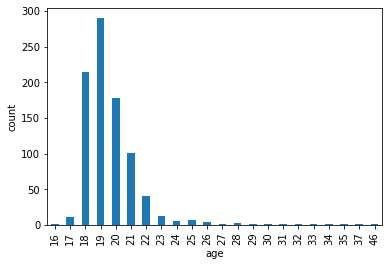

In [62]:
age_plot = cs220_ages.value_counts().sort_index().plot.bar()
age_plot.set(xlabel = "age", ylabel = "count")